- check if with_storage
- make sure dataset paths are apt
- make sure datasets are not sample
- make sure storage path and study name for study is the same
- keep note of optuna trial in notebook
- best_model_path and epoch for for the tuned autoencoder
- choose whether to export model or not
- choose whether to visualize with TSNE or not
- change path of best_autoencoder in the outer objective function
- change improvement_threshold and good_model_threshold parameters
- change gamma trial suggestion in the inner objective function

In [ ]:
with_storage = False
sample_size = 0.05
use_sample = True

In [ ]:
import pandas as pd

train_set_path = (
    "/home/jbct/Projects/thesis/db-ocsvm/data/processed/NSL-KDD/train_set_full.csv"
)
train_df = pd.read_csv(train_set_path)
if use_sample:
    train_df = train_df.sample(frac=sample_size, random_state=42).reset_index(drop=True)
print(train_df.shape)
train_df.head(3)

(1347, 122)


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,5.833486e-07,2.572642e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,2.702969e-07,2.616156e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.579751e-07,2.145141e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Splitting Data

In [3]:
from sklearn.model_selection import train_test_split

X_train_full = train_df.values
X_train, X_val = train_test_split(train_df, test_size=0.2, random_state=42)
X_train = X_train.values
X_val = X_val.values
print(X_train.shape, X_val.shape, X_train_full.shape)

(1077, 122) (270, 122) (1347, 122)


In [4]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
X_val_tensor = torch.FloatTensor(X_val)

# Create data loaders
train_dataset = TensorDataset(X_train_tensor)
val_dataset = TensorDataset(X_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)

model architecture

In [5]:
from models import BatchNormAutoencoder

device = "cuda" if torch.cuda.is_available() else "cpu"

input_dim = X_train.shape[1]

import unsplit data

In [ ]:
train_set_path = (
    "/home/jbct/Projects/thesis/db-ocsvm/data/processed/NSL-KDD/train_set_unsplit.csv"
)
train_set_unsplit = pd.read_csv(train_set_path)
if use_sample:
    train_set_unsplit = train_set_unsplit.sample(
        frac=sample_size, random_state=42
    ).reset_index(drop=True)
print(train_set_unsplit.shape)
train_set_unsplit.head(3)

(2519, 125)


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,attack_binary,attack_categorical,attack_class
0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1,neptune,DoS
1,0.0,5.797253e-09,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1,nmap,Probe
2,0.0,1.775409e-07,1.931390e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,normal,normal


training autoencoder

/home/jbct/Projects/thesis/db-ocsvm/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-03-03 23:04:13,276] A new study created in RDB with name: study_proposed_03



Using device: cpu
Training autoencoder...
Epoch 1/50, Train Loss: 0.0265383509, Val Loss: 0.0149483547
✅ Model saved with val_loss: 0.0149483547
Epoch 2/50, Train Loss: 0.0088181567, Val Loss: 0.0120203653
✅ Model saved with val_loss: 0.0120203653
Epoch 3/50, Train Loss: 0.0084015417, Val Loss: 0.0114762062
✅ Model saved with val_loss: 0.0114762062
Epoch 4/50, Train Loss: 0.0079351358, Val Loss: 0.0101401966
✅ Model saved with val_loss: 0.0101401966
Epoch 5/50, Train Loss: 0.0072552565, Val Loss: 0.0092381416
✅ Model saved with val_loss: 0.0092381416
Epoch 6/50, Train Loss: 0.0066270750, Val Loss: 0.0088652024
✅ Model saved with val_loss: 0.0088652024
Epoch 7/50, Train Loss: 0.0065187841, Val Loss: 0.0085624774
✅ Model saved with val_loss: 0.0085624774
Epoch 8/50, Train Loss: 0.0063329057, Val Loss: 0.0085000427
✅ Model saved with val_loss: 0.0085000427
Epoch 9/50, Train Loss: 0.0060084804, Val Loss: 0.0083419959
✅ Model saved with val_loss: 0.0083419959
Early stopping triggered after

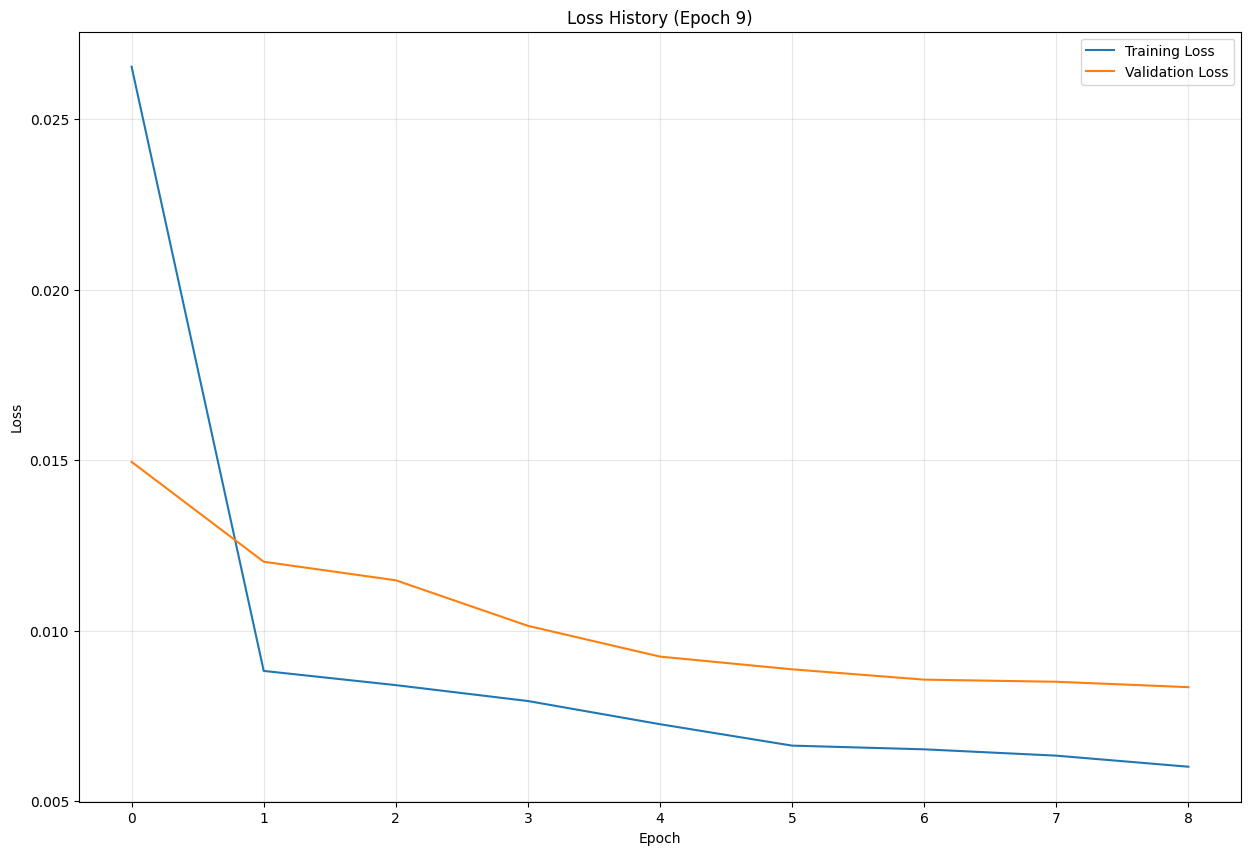

[I 2025-03-03 23:04:15,276] A new study created in memory with name: no-name-c89b3cfe-5d11-4e85-a45e-fac71312bd52


Model is good with loss 0.008341995906084776
Finished training autoencoder


[I 2025-03-03 23:04:16,031] Trial 0 finished with value: 0.7197207852500332 and parameters: {'nu': 0.3552373692141969, 'gamma': 0.22032378071611708}. Best is trial 0 with value: 0.7197207852500332.
[I 2025-03-03 23:04:16,869] Trial 1 finished with value: 0.7352036079055578 and parameters: {'nu': 0.16411908871840683, 'gamma': 0.16666235716405844}. Best is trial 1 with value: 0.7352036079055578.
[I 2025-03-03 23:04:17,563] Trial 2 finished with value: 0.6613686607419197 and parameters: {'nu': 0.49610526215393524, 'gamma': 0.5861486405308107}. Best is trial 1 with value: 0.7352036079055578.
[I 2025-03-03 23:04:18,246] Trial 3 finished with value: 0.6542191714197285 and parameters: {'nu': 0.20481871461517104, 'gamma': 0.7896877142377158}. Best is trial 1 with value: 0.7352036079055578.
[I 2025-03-03 23:04:18,926] Trial 4 finished with value: 0.6962981385683336 and parameters: {'nu': 0.2167223814674838, 'gamma': 0.3457536128631421}. Best is trial 1 with value: 0.7352036079055578.
[I 2025-03


Using device: cpu
Training autoencoder...
Epoch 1/50, Train Loss: 0.1620106697, Val Loss: 0.1876300424
✅ Model saved with val_loss: 0.1876300424
Epoch 2/50, Train Loss: 0.0303721352, Val Loss: 0.0645528995
✅ Model saved with val_loss: 0.0645528995
Epoch 3/50, Train Loss: 0.0116905456, Val Loss: 0.0291766766
✅ Model saved with val_loss: 0.0291766766
Epoch 4/50, Train Loss: 0.0086712643, Val Loss: 0.0151310680
✅ Model saved with val_loss: 0.0151310680
Epoch 5/50, Train Loss: 0.0072416418, Val Loss: 0.0103253177
✅ Model saved with val_loss: 0.0103253177
Epoch 6/50, Train Loss: 0.0059993258, Val Loss: 0.0076684994
✅ Model saved with val_loss: 0.0076684994
Epoch 7/50, Train Loss: 0.0057534949, Val Loss: 0.0067331970
✅ Model saved with val_loss: 0.0067331970
Epoch 8/50, Train Loss: 0.0055245541, Val Loss: 0.0064919102
✅ Model saved with val_loss: 0.0064919102
Epoch 9/50, Train Loss: 0.0053274385, Val Loss: 0.0063709409
✅ Model saved with val_loss: 0.0063709409
Epoch 10/50, Train Loss: 0.004

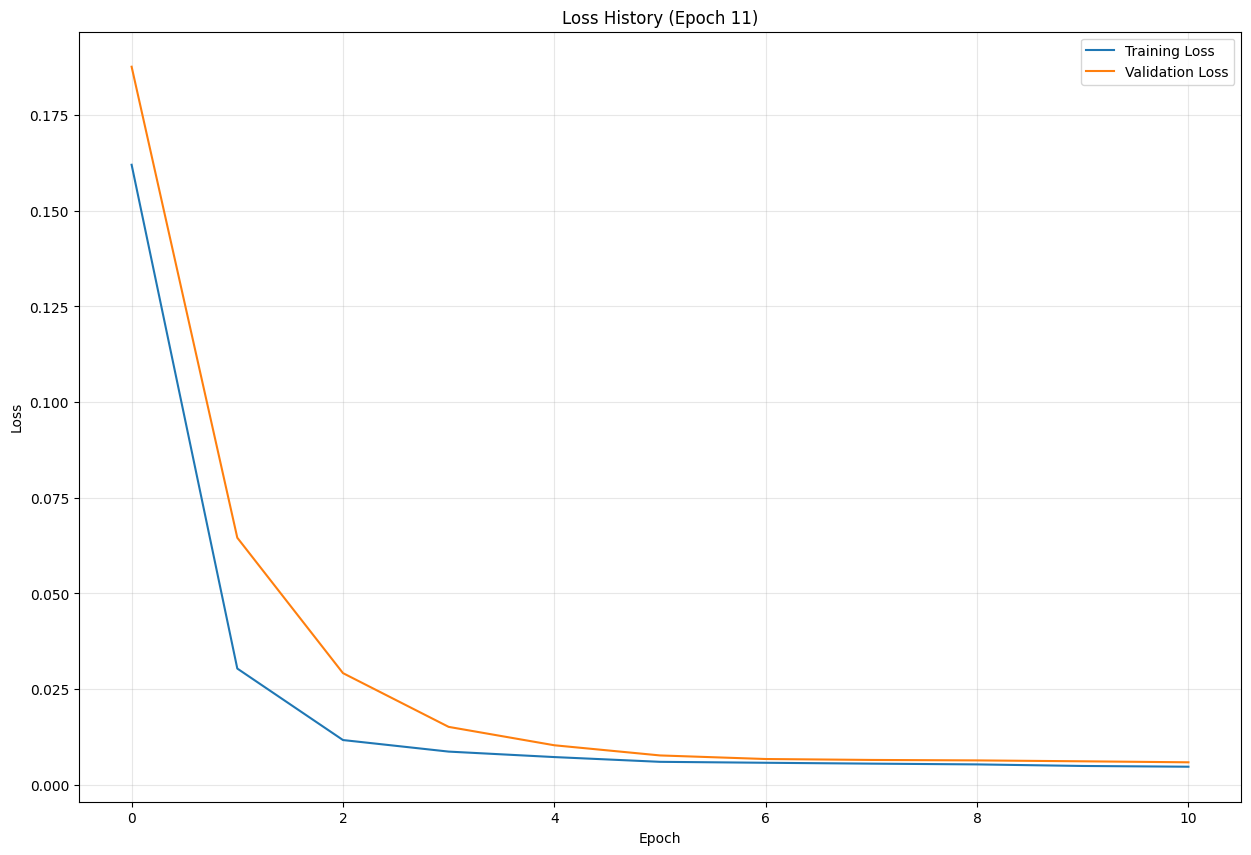

[I 2025-03-03 23:04:27,796] A new study created in memory with name: no-name-bc73f86e-c143-4653-9a2e-93663b68e901


Model is good with loss 0.005874157650396228
Finished training autoencoder


[I 2025-03-03 23:04:28,093] Trial 0 finished with value: 0.7129780695936685 and parameters: {'nu': 0.18413359792837847, 'gamma': 0.54143923825462}. Best is trial 0 with value: 0.7129780695936685.
[I 2025-03-03 23:04:28,381] Trial 1 finished with value: 0.7562530397488615 and parameters: {'nu': 0.4459736119949358, 'gamma': 0.6891801379356292}. Best is trial 1 with value: 0.7562530397488615.
[I 2025-03-03 23:04:28,648] Trial 2 finished with value: 0.5577607551841536 and parameters: {'nu': 0.3758571567204595, 'gamma': 0.19388004648531199}. Best is trial 1 with value: 0.7562530397488615.
[I 2025-03-03 23:04:28,803] Trial 3 finished with value: 0.6927278153601273 and parameters: {'nu': 0.14205666691430915, 'gamma': 0.47029823638861307}. Best is trial 1 with value: 0.7562530397488615.
[I 2025-03-03 23:04:28,931] Trial 4 finished with value: 0.5438563912101518 and parameters: {'nu': 0.11976188211445872, 'gamma': 0.1968257629606716}. Best is trial 1 with value: 0.7562530397488615.
[I 2025-03-0


Using device: cpu
Training autoencoder...
Epoch 1/50, Train Loss: 0.2255787783, Val Loss: 0.2350920588
✅ Model saved with val_loss: 0.2350920588
Epoch 2/50, Train Loss: 0.1570594476, Val Loss: 0.1911541671
✅ Model saved with val_loss: 0.1911541671
Epoch 3/50, Train Loss: 0.1036880347, Val Loss: 0.1365073621
✅ Model saved with val_loss: 0.1365073621
Epoch 4/50, Train Loss: 0.0670644115, Val Loss: 0.0909536158
✅ Model saved with val_loss: 0.0909536158
Epoch 5/50, Train Loss: 0.0436123634, Val Loss: 0.0551693402
✅ Model saved with val_loss: 0.0551693402
Epoch 6/50, Train Loss: 0.0314522100, Val Loss: 0.0344649988
✅ Model saved with val_loss: 0.0344649988
Epoch 7/50, Train Loss: 0.0234423230, Val Loss: 0.0245215259
✅ Model saved with val_loss: 0.0245215259
Epoch 8/50, Train Loss: 0.0188796936, Val Loss: 0.0195260973
✅ Model saved with val_loss: 0.0195260973
Epoch 9/50, Train Loss: 0.0157883309, Val Loss: 0.0167322507
✅ Model saved with val_loss: 0.0167322507
Epoch 10/50, Train Loss: 0.014

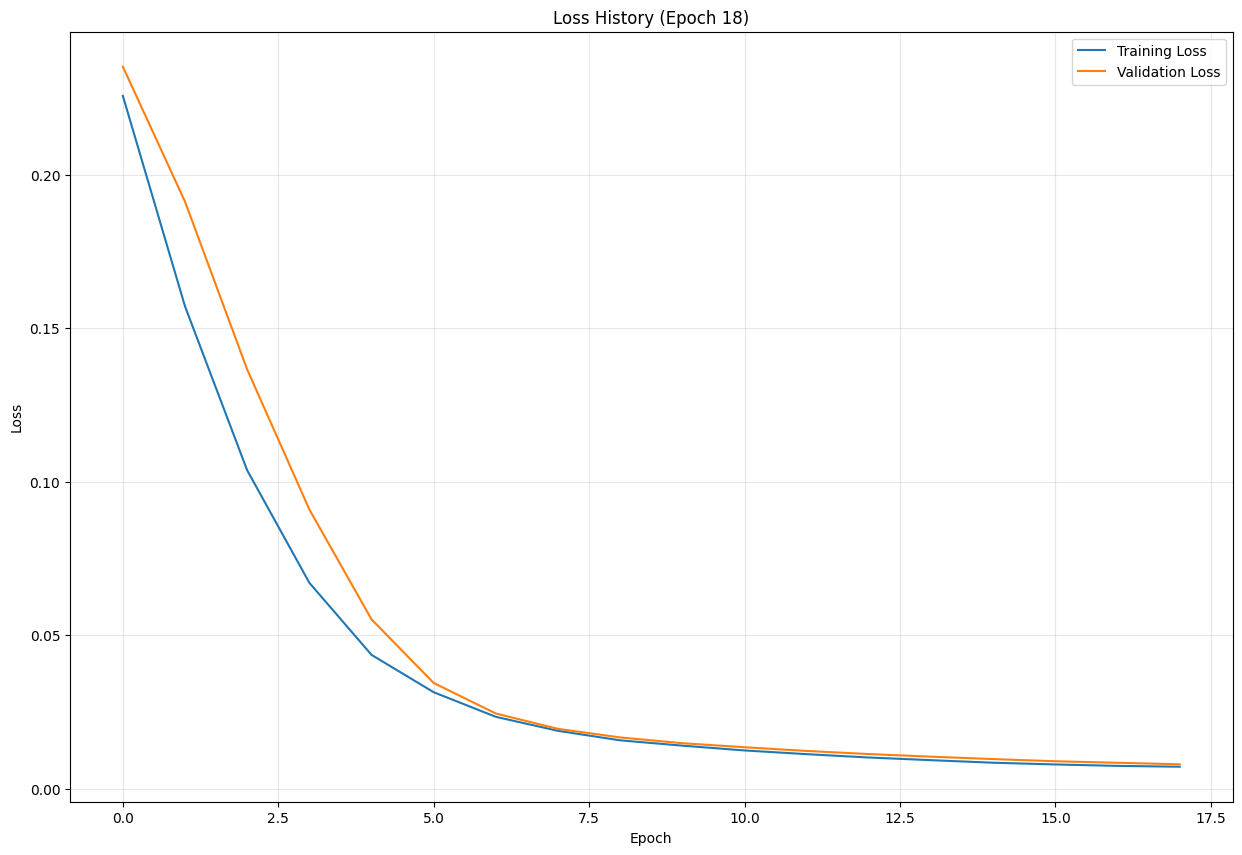

[I 2025-03-03 23:04:33,467] A new study created in memory with name: no-name-dae9a9c8-363d-4f97-8b9e-7a85368329b7
[I 2025-03-03 23:04:33,624] Trial 0 finished with value: 0.9086903656541538 and parameters: {'nu': 0.09997521950456234, 'gamma': 0.4894492615288036}. Best is trial 0 with value: 0.9086903656541538.


Model is good with loss 0.007995817344635725
Finished training autoencoder


[I 2025-03-03 23:04:34,047] Trial 1 finished with value: 0.7276694521819869 and parameters: {'nu': 0.4851514534150376, 'gamma': 0.057189205744745425}. Best is trial 0 with value: 0.9086903656541538.
[I 2025-03-03 23:04:34,371] Trial 2 finished with value: 0.8066620241411326 and parameters: {'nu': 0.2994438818816931, 'gamma': 0.07020412001946631}. Best is trial 0 with value: 0.9086903656541538.
[I 2025-03-03 23:04:34,809] Trial 3 finished with value: 0.7852334527125614 and parameters: {'nu': 0.3872688131759608, 'gamma': 0.660890501253646}. Best is trial 0 with value: 0.9086903656541538.
[I 2025-03-03 23:04:35,191] Trial 4 finished with value: 0.7637905115620993 and parameters: {'nu': 0.4317234251506863, 'gamma': 0.8602714016776414}. Best is trial 0 with value: 0.9086903656541538.
[I 2025-03-03 23:04:35,421] Trial 5 finished with value: 0.8650240969182474 and parameters: {'nu': 0.2217853967128573, 'gamma': 0.2512830215270559}. Best is trial 0 with value: 0.9086903656541538.
[I 2025-03-03


Using device: cpu
Training autoencoder...
Epoch 1/50, Train Loss: 0.0864992133, Val Loss: 0.0599294615
✅ Model saved with val_loss: 0.0599294615
Epoch 2/50, Train Loss: 0.0089562745, Val Loss: 0.0134930524
✅ Model saved with val_loss: 0.0134930524
Epoch 3/50, Train Loss: 0.0066496376, Val Loss: 0.0089270926
✅ Model saved with val_loss: 0.0089270926
Epoch 4/50, Train Loss: 0.0052262180, Val Loss: 0.0059310213
✅ Model saved with val_loss: 0.0059310213
Epoch 5/50, Train Loss: 0.0044755843, Val Loss: 0.0053440270
✅ Model saved with val_loss: 0.0053440270
Epoch 6/50, Train Loss: 0.0041947076, Val Loss: 0.0050760348
✅ Model saved with val_loss: 0.0050760348
Epoch 7/50, Train Loss: 0.0037983265, Val Loss: 0.0047376999
✅ Model saved with val_loss: 0.0047376999
Epoch 8/50, Train Loss: 0.0034411283, Val Loss: 0.0044767378
✅ Model saved with val_loss: 0.0044767378
Epoch 9/50, Train Loss: 0.0033923826, Val Loss: 0.0042856761
✅ Model saved with val_loss: 0.0042856761
Early stopping triggered after

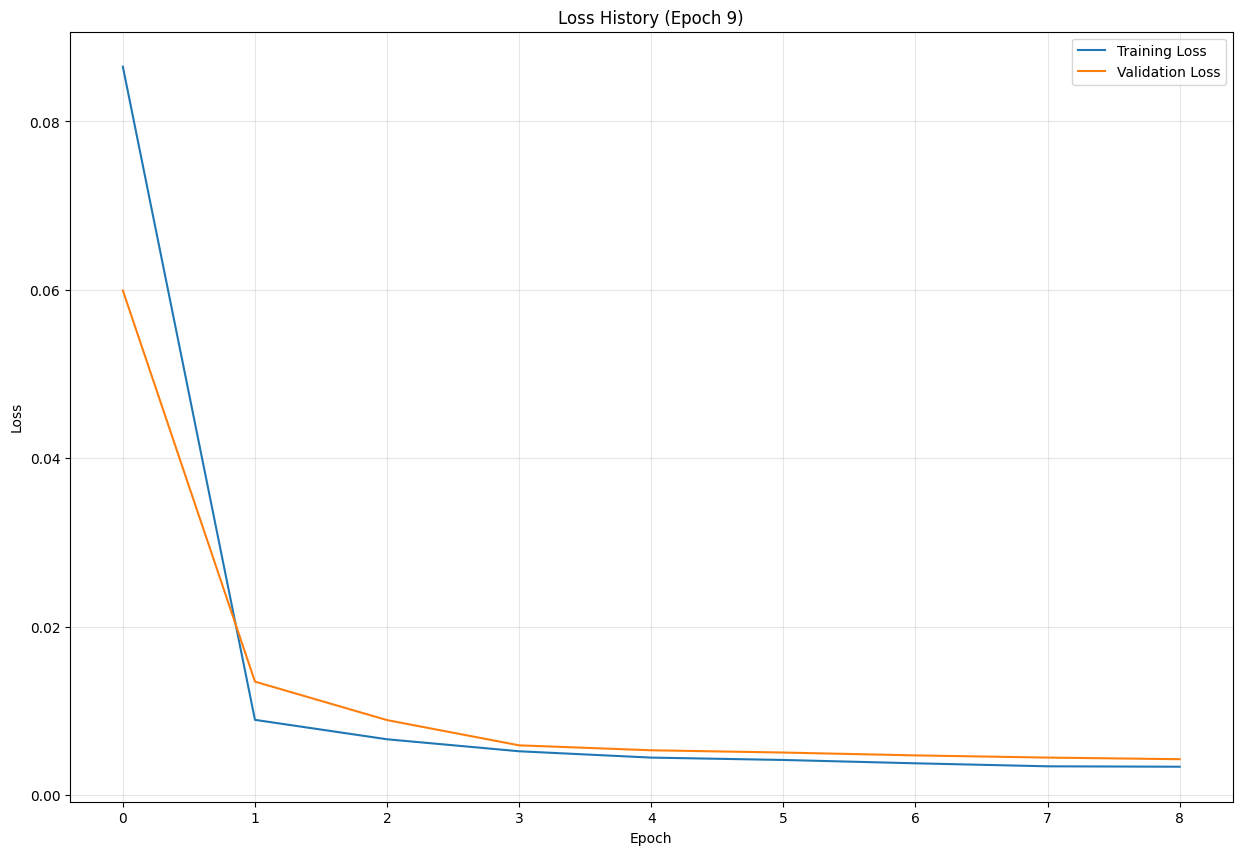

[I 2025-03-03 23:04:39,120] A new study created in memory with name: no-name-0d0c31de-43ee-4456-ac78-ab8f99ba87a3
[I 2025-03-03 23:04:39,270] Trial 0 finished with value: 0.9114615112525976 and parameters: {'nu': 0.02774626645227079, 'gamma': 0.509026875064737}. Best is trial 0 with value: 0.9114615112525976.


Model is good with loss 0.004285676094392936
Finished training autoencoder


[I 2025-03-03 23:04:39,684] Trial 1 finished with value: 0.7328149179820489 and parameters: {'nu': 0.4969384716130521, 'gamma': 0.3462562760657862}. Best is trial 0 with value: 0.9114615112525976.
[I 2025-03-03 23:04:39,964] Trial 2 finished with value: 0.8820920104346287 and parameters: {'nu': 0.13058427696499975, 'gamma': 0.9161190224822963}. Best is trial 0 with value: 0.9114615112525976.
[I 2025-03-03 23:04:40,146] Trial 3 finished with value: 0.9003415572357076 and parameters: {'nu': 0.09950325526067598, 'gamma': 0.09051474098247222}. Best is trial 0 with value: 0.9114615112525976.
[I 2025-03-03 23:04:40,507] Trial 4 finished with value: 0.82532387142415 and parameters: {'nu': 0.2962479030906163, 'gamma': 0.7498469186584339}. Best is trial 0 with value: 0.9114615112525976.
[I 2025-03-03 23:04:40,781] Trial 5 finished with value: 0.8658100101693417 and parameters: {'nu': 0.21485430585404186, 'gamma': 0.3649870701742193}. Best is trial 0 with value: 0.9114615112525976.
[I 2025-03-03


Using device: cpu
Training autoencoder...
Epoch 1/50, Train Loss: 0.2442622605, Val Loss: 0.2394466996
✅ Model saved with val_loss: 0.2394466996
Epoch 2/50, Train Loss: 0.2347823977, Val Loss: 0.2327673107
✅ Model saved with val_loss: 0.2327673107
Epoch 3/50, Train Loss: 0.2253774606, Val Loss: 0.2234127015
✅ Model saved with val_loss: 0.2234127015
Epoch 4/50, Train Loss: 0.2158587032, Val Loss: 0.2117181629
✅ Model saved with val_loss: 0.2117181629
Epoch 5/50, Train Loss: 0.2062091266, Val Loss: 0.2016603440
✅ Model saved with val_loss: 0.2016603440
Epoch 6/50, Train Loss: 0.1967521923, Val Loss: 0.1916810721
✅ Model saved with val_loss: 0.1916810721
Epoch 7/50, Train Loss: 0.1872639349, Val Loss: 0.1825747579
✅ Model saved with val_loss: 0.1825747579
Epoch 8/50, Train Loss: 0.1777899677, Val Loss: 0.1734459758
✅ Model saved with val_loss: 0.1734459758
Epoch 9/50, Train Loss: 0.1683603551, Val Loss: 0.1638605475
✅ Model saved with val_loss: 0.1638605475
Epoch 10/50, Train Loss: 0.159

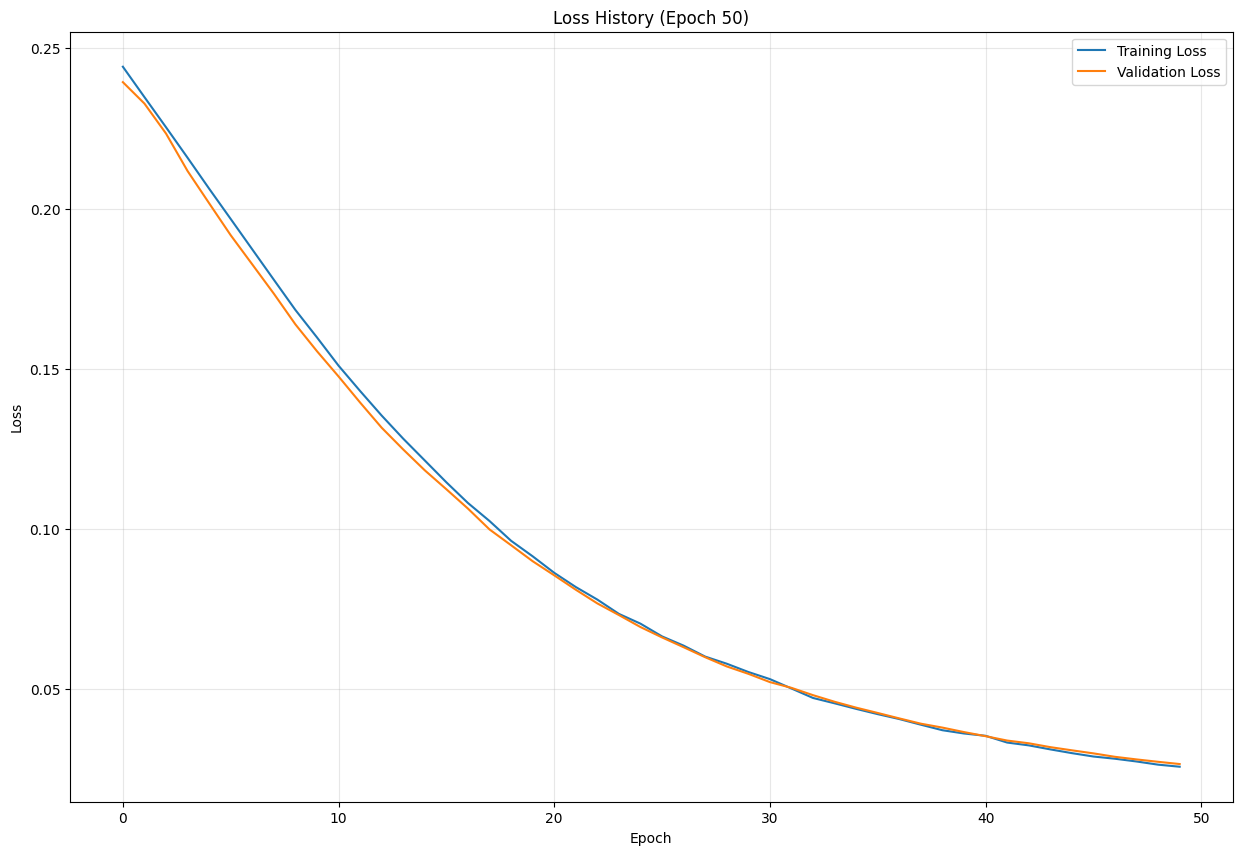

[I 2025-03-03 23:04:47,849] A new study created in memory with name: no-name-cfc786eb-0447-46c8-8175-b3e9de90a3fc
[I 2025-03-03 23:04:48,015] Trial 0 finished with value: 0.6752719193526993 and parameters: {'nu': 0.14063583038263175, 'gamma': 0.2782448633886588}. Best is trial 0 with value: 0.6752719193526993.


Model is good with loss 0.026664762198925017
Finished training autoencoder


[I 2025-03-03 23:04:48,433] Trial 1 finished with value: 0.7610116284210992 and parameters: {'nu': 0.44161439890978016, 'gamma': 0.9618790268817261}. Best is trial 1 with value: 0.7610116284210992.
[I 2025-03-03 23:04:48,693] Trial 2 finished with value: 0.8380300216651192 and parameters: {'nu': 0.2791905953580783, 'gamma': 0.8743055311543091}. Best is trial 2 with value: 0.8380300216651192.
[I 2025-03-03 23:04:49,132] Trial 3 finished with value: 0.47598156254145113 and parameters: {'nu': 0.4926187240657963, 'gamma': 0.06979543505050373}. Best is trial 2 with value: 0.8380300216651192.
[I 2025-03-03 23:04:49,476] Trial 4 finished with value: 0.7685524163240042 and parameters: {'nu': 0.42532935686874557, 'gamma': 0.9555643038826195}. Best is trial 2 with value: 0.8380300216651192.
[I 2025-03-03 23:04:49,735] Trial 5 finished with value: 0.8221481628863244 and parameters: {'nu': 0.3095862589674331, 'gamma': 0.8536557654378877}. Best is trial 2 with value: 0.8380300216651192.
[I 2025-03-

In [ ]:
import optuna
from tuning_utils import outer_objective

storage_path = "sqlite:///optuna_storage/study_proposed_03.db"
trials = 1

objective_lambda = lambda trial: outer_objective(
    trial,
    train_dataset,
    val_dataset,
    train_set_unsplit,
    input_dim,
    seed=42,
    cudnn_deterministic=False,
    verbose=True,
)


if with_storage:
    study = optuna.create_study(
        direction="maximize",
        storage=storage_path,
        study_name="study_proposed_03",
        load_if_exists=True,
    )
    study.optimize(objective_lambda, n_trials=trials)
else:
    study = optuna.create_study(direction="maximize")
    study.optimize(objective_lambda, n_trials=trials)

In [8]:
import pprint

print("best params:")
pprint.pprint(study.best_params)
print("best value:")
pprint.pprint(study.best_value)

best params:
{'batch_size': 128,
 'hidden_factor_0': 0.7445897499790889,
 'hidden_factor_1': 0.5971498171282006,
 'latent_factor': 0.5218176819897566,
 'lr': 0.01,
 'num_hidden_layers': 2}
best value:
0.9178129283282486


In [9]:
best_trial = study.best_trial

# Access user attributes of the best trial
best_trial_user_attrs = best_trial.user_attrs

# Print user attributes of the best trial
pprint.pprint(best_trial_user_attrs)

{'best_ocsvm_params': {'gamma': 0.4072166889088681, 'nu': 0.059638029354999865},
 'final_val_loss': 0.004285676094392936,
 'hidden_dims': [90, 53],
 'latent_dim': 27}


In [10]:
# TODO: remove
study_gamma = best_trial_user_attrs["best_ocsvm_params"]["gamma"]
study_nu = best_trial_user_attrs["best_ocsvm_params"]["nu"]
study_hidden_dims = best_trial_user_attrs["hidden_dims"]
study_latent_dim = best_trial_user_attrs["latent_dim"]

In [11]:
from tuning_utils import set_seed

set_seed(42, False)

training with the best parameters

import full normal dataset

In [ ]:
import pandas as pd

train_set_path = (
    "/home/jbct/Projects/thesis/db-ocsvm/data/processed/NSL-KDD/train_set_full.csv"
)
train_df = pd.read_csv(train_set_path)
if use_sample:
    train_df = train_df.sample(frac=sample_size, random_state=42).reset_index(drop=True)
print(train_df.shape)
train_df.head(3)

(6734, 122)


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,5.833486e-07,2.572642e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,2.702969e-07,2.616156e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.579751e-07,2.145141e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


splitting dataset

In [13]:
from sklearn.model_selection import train_test_split

X_train_full = train_df.values
X_train, X_val = train_test_split(train_df, test_size=0.2, random_state=42)
X_train = X_train.values
X_val = X_val.values
print(X_train.shape, X_val.shape, X_train_full.shape)

(5387, 122) (1347, 122) (6734, 122)


In [14]:
study_batch_size = study.best_params["batch_size"]

In [15]:
# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
X_val_tensor = torch.FloatTensor(X_val)

# Create data loaders
train_dataset = TensorDataset(X_train_tensor)
val_dataset = TensorDataset(X_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=study_batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=study_batch_size, shuffle=False)

setting up architecture

In [16]:
device = "cuda" if torch.cuda.is_available() else "cpu"

input_dim = X_train.shape[1]
hidden_dims = best_trial_user_attrs["hidden_dims"]
latent_dim = best_trial_user_attrs["latent_dim"]

autoencoder = BatchNormAutoencoder(
    input_dim=input_dim,
    hidden_dims=hidden_dims,
    latent_dim=latent_dim,
    activation_type="LeakyReLU",
    output_activation_type="Sigmoid",  # Since data is normalized to [0,1]
)

autoencoder = autoencoder.to(device)

training autoencoder

Using device: cpu
Training autoencoder...
Epoch 1/10, Train Loss: 0.0239269492, Val Loss: 0.0045914515
✅ Model saved with val_loss: 0.0045914515
Epoch 2/10, Train Loss: 0.0042968917, Val Loss: 0.0035254265
✅ Model saved with val_loss: 0.0035254265
Epoch 3/10, Train Loss: 0.0034743385, Val Loss: 0.0028966292
✅ Model saved with val_loss: 0.0028966292
Epoch 4/10, Train Loss: 0.0031600829, Val Loss: 0.0026879631
✅ Model saved with val_loss: 0.0026879631
Epoch 5/10, Train Loss: 0.0030379331, Val Loss: 0.0026134573
✅ Model saved with val_loss: 0.0026134573


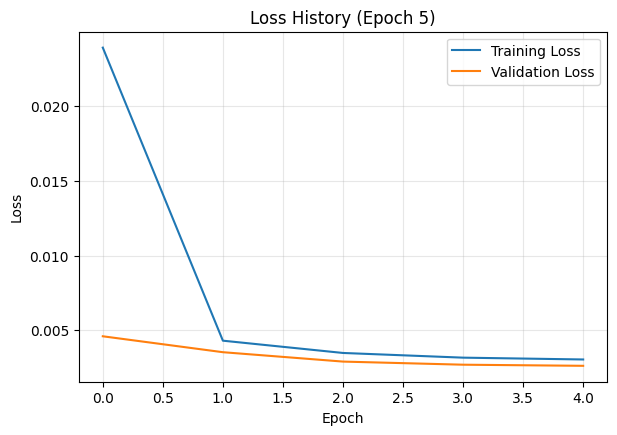

Epoch 6/10, Train Loss: 0.0030325078, Val Loss: 0.0025078668
✅ Model saved with val_loss: 0.0025078668
Epoch 7/10, Train Loss: 0.0028114899, Val Loss: 0.0022998798
✅ Model saved with val_loss: 0.0022998798
Epoch 8/10, Train Loss: 0.0023438079, Val Loss: 0.0017299630
✅ Model saved with val_loss: 0.0017299630
Epoch 9/10, Train Loss: 0.0017540557, Val Loss: 0.0015705267
✅ Model saved with val_loss: 0.0015705267
Epoch 10/10, Train Loss: 0.0017657583, Val Loss: 0.0015521817
✅ Model saved with val_loss: 0.0015521817


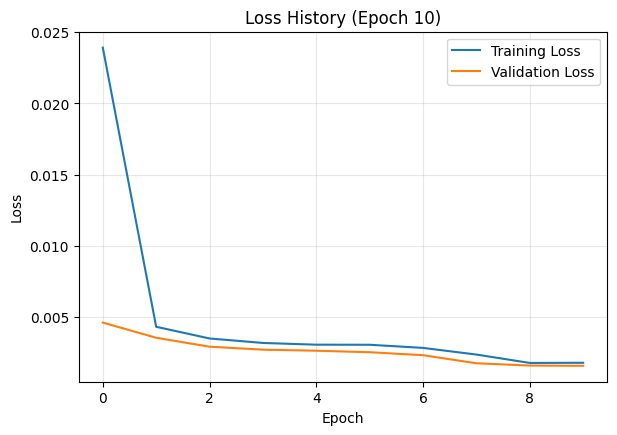

In [17]:
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.optim as optim

study_lr = study.best_params["lr"]
epochs = 10
optimizer = optim.Adam(autoencoder.parameters(), lr=study_lr)
criterion = nn.MSELoss()

best_model_path = "./best_autoencoder.pth"

print(f"Using device: {device}")
print("Training autoencoder...")


history = {"loss": [], "val_loss": []}
autoencoder.train()

best_val_loss = float("inf")
for epoch in range(epochs):
    total_loss = 0.0
    for batch in train_loader:
        batch_x = batch[0].to(device)

        # Forward pass
        outputs = autoencoder(batch_x)
        loss = criterion(outputs, batch_x)

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # Print epoch statistics
    avg_loss = total_loss / len(train_loader)
    # print(f"Epoch [{epoch+1}/{epochs}], Average Loss: {avg_loss:.6f}")
    history["loss"].append(avg_loss)

    if val_loader is not None:
        autoencoder.eval()
        val_loss = 0.0

        with torch.no_grad():
            for val_batch in val_loader:
                val_inputs = val_batch[0].to(device)
                val_outputs = autoencoder(val_inputs)
                batch_val_loss = criterion(val_outputs, val_inputs).item()
                val_loss += batch_val_loss

        avg_val_loss = val_loss / len(val_loader)
        history["val_loss"].append(avg_val_loss)
        print(
            f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_loss:.10f}, Val Loss: {avg_val_loss:.10f}"
        )
        # Save model if validation loss improved
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            torch.save(
                {
                    "epoch": epoch,
                    "model_state_dict": autoencoder.state_dict(),
                    "optimizer_state_dict": optimizer.state_dict(),
                    "val_loss": best_val_loss,
                },
                best_model_path,
            )
            print(f"✅ Model saved with val_loss: {best_val_loss:.10f}")
            autoencoder.train()  # Switch back to training mode after validation
    else:
        # If no validation set, save based on training loss
        if avg_loss < best_val_loss:
            best_val_loss = avg_loss
            torch.save(
                {
                    "epoch": epoch,
                    "model_state_dict": autoencoder.state_dict(),
                    "optimizer_state_dict": optimizer.state_dict(),
                    "train_loss": best_val_loss,
                },
                best_model_path,
            )
            print(f"✅ Model saved with train_loss: {best_val_loss:.10f}")
        print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.10f}")

    if (epoch + 1) % 5 == 0 or epoch == epochs - 1:
        plt.figure(figsize=(15, 10))

        # Plot 1: Loss history
        plt.subplot(2, 2, 1)
        plt.plot(history["loss"], label="Training Loss")
        if "val_loss" in history and history["val_loss"]:
            plt.plot(history["val_loss"], label="Validation Loss")
        plt.title(f"Loss History (Epoch {epoch+1})")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()

        plt.close()

loading the best model

In [18]:
# Load best model
print("Training complete. Loading best model...")
checkpoint = torch.load(best_model_path)
autoencoder.load_state_dict(checkpoint["model_state_dict"])
best_epoch = checkpoint["epoch"]
best_loss = checkpoint.get("val_loss", checkpoint.get("train_loss"))
print(
    f"Loaded model from epoch {best_epoch+1} with {'validation' if 'val_loss' in checkpoint else 'training'} loss: {best_loss:.4f}"
)
# Set model to evaluation mode
autoencoder.eval()

Training complete. Loading best model...
Loaded model from epoch 10 with validation loss: 0.0016


BatchNormAutoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=122, out_features=90, bias=True)
    (1): BatchNorm1d(90, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): Linear(in_features=90, out_features=53, bias=True)
    (4): BatchNorm1d(53, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): LeakyReLU(negative_slope=0.01)
    (6): Linear(in_features=53, out_features=27, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=27, out_features=53, bias=True)
    (1): BatchNorm1d(53, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): Linear(in_features=53, out_features=90, bias=True)
    (4): BatchNorm1d(90, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): LeakyReLU(negative_slope=0.01)
    (6): Linear(in_features=90, out_features=122, bias=True)
    (7): Sigmoid()
  )
)

exporting the model

In [19]:
import torch.onnx

# Set model to evaluation mode
autoencoder.eval()

export_model = False

if export_model:
    # Prepare a sample input tensor with the correct shape
    dummy_input = torch.randn(1, input_dim, device=device)

    # Export the model to ONNX format
    onnx_path = "autoencoder.onnx"
    torch.onnx.export(
        autoencoder,  # model being run
        dummy_input,  # model input
        onnx_path,  # where to save the model
        export_params=True,  # store trained parameters inside model file
        opset_version=17,  # ONNX version
        do_constant_folding=True,  # optimize constant folding
        input_names=["input"],  # model's input names
        output_names=["output"],  # model's output names
        dynamic_axes={
            "input": {0: "batch_size"},  # variable length axes
            "output": {0: "batch_size"},
        },
    )

    print(f"Model exported to ONNX format: {onnx_path}")

importing test set

In [20]:
test_set_path = (
    "/home/jbct/Projects/thesis/db-ocsvm/data/processed/NSL-KDD/test_set.csv"
)
test_df = pd.read_csv(test_set_path)
print(test_df.shape)
test_df.head(3)

(22543, 125)


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,attack_binary,attack_categorical,attack_class
0,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1,neptune,DoS
1,0.000047,9.408217e-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,normal,normal
2,0.000000,1.449313e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1,saint,Probe


splitting into X and y

In [21]:
X_test = test_df.drop(
    columns=["attack_binary", "attack_categorical", "attack_class"]
).values
y_test = test_df["attack_binary"].values
y_test_class = test_df["attack_class"]

evaluate reconstruction error on test set

In [22]:
from utils import evaluate_reconstruction_error

X_test = test_df.drop(
    columns=["attack_binary", "attack_categorical", "attack_class"]
).values
y_test = test_df["attack_binary"].values
y_test_class = test_df["attack_class"]

print(X_test.shape, y_test.shape)
print("Evaluating reconstruction error...")

results = evaluate_reconstruction_error(
    autoencoder, X_test, y_test, device, model_type="batch_norm_autoencoder"
)

(22543, 122) (22543,)
Evaluating reconstruction error...
Avg Reconstruction Error (Normal): 0.0020
Avg Reconstruction Error (Anomaly): 0.0282
Error Ratio (Anomaly/Normal): 13.80x


Extract features from normal training data for OCSVM

In [23]:
train_set_path = (
    "/home/jbct/Projects/thesis/db-ocsvm/data/processed/NSL-KDD/train_set_full.csv"
)
train_df = pd.read_csv(train_set_path)
train_df = train_df.sample(frac=0.1, random_state=42).reset_index(drop=True)
print(train_df.shape)
train_df.head(1)

(6734, 122)


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,5.833486e-07,2.572642e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [24]:
X_train_full = train_df.values
print(X_train_full.shape)

(6734, 122)


In [25]:
import numpy as np

autoencoder.eval()
X_train_normal_tensor = torch.FloatTensor(X_train_full).to(device)
X_train_encoded = []

# Extract in batches to prevent memory issues
normal_dataset = TensorDataset(
    X_train_normal_tensor, torch.zeros(len(X_train_normal_tensor))
)
normal_loader = DataLoader(normal_dataset, batch_size=128)

with torch.no_grad():
    for data, _ in normal_loader:
        encoded = autoencoder.encode(data)
        X_train_encoded.append(encoded.cpu().numpy())

X_train_encoded = np.vstack(X_train_encoded)
print(X_train_encoded.shape)

(6734, 27)


Extract features from test data

In [26]:
X_test_tensor = torch.FloatTensor(X_test).to(device)
X_test_encoded = []

test_dataset = TensorDataset(X_test_tensor, torch.zeros(len(X_test_tensor)))
test_loader = DataLoader(test_dataset, batch_size=128)

with torch.no_grad():
    for data, _ in test_loader:
        encoded = autoencoder.encode(data)
        X_test_encoded.append(encoded.cpu().numpy())

X_test_encoded = np.vstack(X_test_encoded)
print(X_test_encoded.shape)

(22543, 27)


In [27]:
from sklearn.svm import OneClassSVM

study_gamma = best_trial_user_attrs["best_ocsvm_params"]["gamma"]
study_nu = best_trial_user_attrs["best_ocsvm_params"]["nu"]

ocsvm = OneClassSVM(kernel="rbf", nu=study_nu, gamma=study_gamma, verbose=True)
ocsvm.fit(X_train_encoded)

[LibSVM].
*.*
optimization finished, #iter = 2178
obj = 322.670538, rho = 1.705846
nSV = 672, nBSV = 176


OneClassSVM(gamma=0.4072166889088681, nu=0.059638029354999865, verbose=True)

evaluation

In [28]:
y_pred = ocsvm.predict(X_test_encoded)

Confusion Matrix:


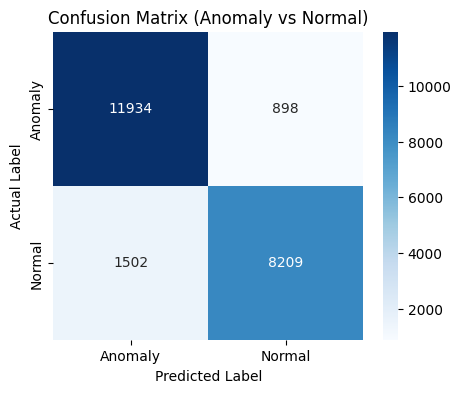

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=[-1, 1])

# Print the confusion matrix
print("Confusion Matrix:")


def plot_confusion_matrix(cm, labels, title):
    plt.figure(figsize=(5, 4))
    sns.heatmap(
        cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels
    )
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.title(title)
    plt.show()


plot_confusion_matrix(cm, ["Anomaly", "Normal"], "Confusion Matrix (Anomaly vs Normal)")

In [30]:
from sklearn.metrics import (
    classification_report,
    precision_score,
    recall_score,
    f1_score,
    accuracy_score,
)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Anomaly", "Normal"]))

precision = precision_score(y_test, y_pred, pos_label=-1)
recall = recall_score(y_test, y_pred, pos_label=-1)
f1 = f1_score(y_test, y_pred, pos_label=-1)
acc = accuracy_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {acc}")

Classification Report:
              precision    recall  f1-score   support

     Anomaly       0.89      0.93      0.91     12832
      Normal       0.90      0.85      0.87      9711

    accuracy                           0.89     22543
   macro avg       0.89      0.89      0.89     22543
weighted avg       0.89      0.89      0.89     22543

Precision: 0.8882107770169694
Recall: 0.9300187032418953
F1 Score: 0.9086340794883508
Accuracy: 0.8935367963447634


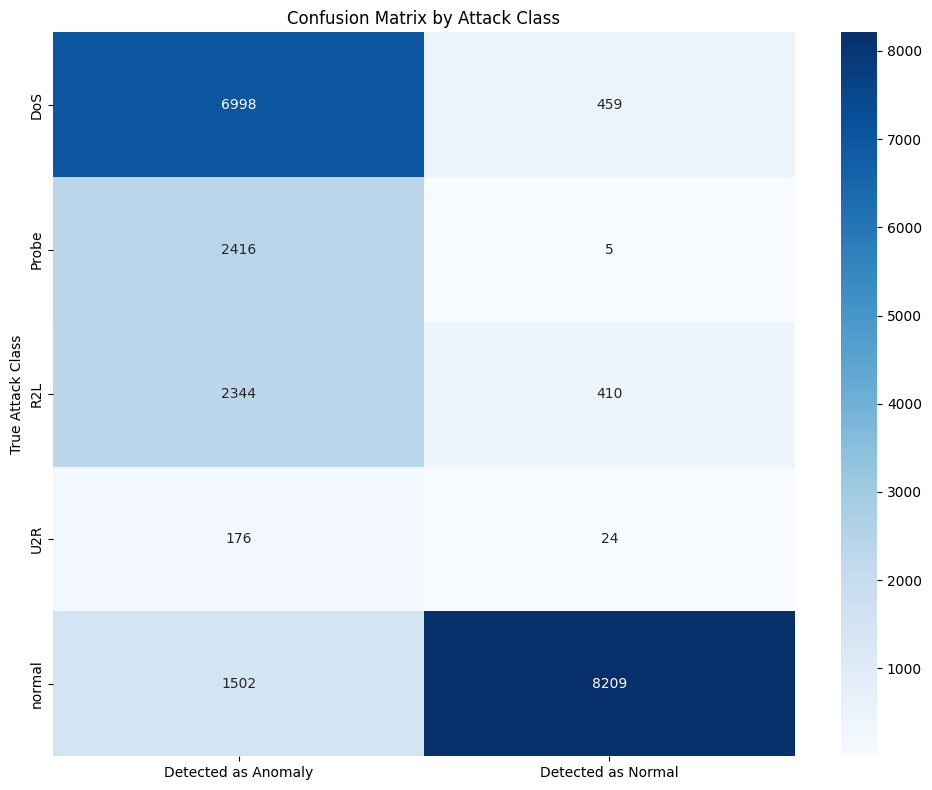

In [31]:
def create_multiclass_cm(y_true_class, y_pred_binary):
    """
    Create a confusion matrix showing how each attack class was classified.

    For attack classes (DoS, Probe, R2L, U2R), correct detection is when y_pred = -1 (anomaly)
    For normal class, correct detection is when y_pred = 1 (normal)
    """
    classes = np.unique(y_true_class)
    cm = np.zeros((len(classes), 2))

    for i, cls in enumerate(classes):
        # Get predictions for this class
        cls_indices = y_true_class == cls
        preds = y_pred_binary[cls_indices]

        # Count correct and incorrect predictions
        if cls == "normal":
            cm[i, 0] = np.sum(preds == -1)  # incorrectly detected as anomaly
            cm[i, 1] = np.sum(preds == 1)  # correctly detected as normal
        else:
            cm[i, 0] = np.sum(preds == -1)  # correctly detected as anomaly
            cm[i, 1] = np.sum(preds == 1)  # incorrectly detected as normal

    return cm, classes


# Create and plot the multi-class confusion matrix
cm_multi, classes = create_multiclass_cm(y_test_class, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(
    cm_multi,
    annot=True,
    fmt="g",
    cmap="Blues",
    xticklabels=["Detected as Anomaly", "Detected as Normal"],
    yticklabels=classes,
)
plt.ylabel("True Attack Class")
plt.title("Confusion Matrix by Attack Class")
plt.tight_layout()
plt.show()

In [32]:
# Calculate detection rates for each class
print("Detection rates by class:")
class_metrics = {}
for cls in np.unique(y_test_class):
    # Get indices for this class
    class_indices = y_test_class == cls

    # True values and predictions for this class
    y_true_cls = y_test[class_indices]
    y_pred_cls = y_pred[class_indices]

    # Calculate metrics
    if cls == "Normal":
        # For normal class, we want to detect 1 (normal)
        correct = np.sum((y_pred_cls == 1))
        precision = precision_score(
            y_true_cls, y_pred_cls, pos_label=1, zero_division=0
        )
        recall = recall_score(y_true_cls, y_pred_cls, pos_label=1, zero_division=0)
    else:
        # For attack classes, we want to detect -1 (anomaly)
        correct = np.sum((y_pred_cls == -1))
        precision = precision_score(
            y_true_cls, y_pred_cls, pos_label=-1, zero_division=0
        )
        recall = recall_score(y_true_cls, y_pred_cls, pos_label=-1, zero_division=0)

    total = len(y_pred_cls)
    detection_rate = correct / total
    f1 = f1_score(
        y_true_cls, y_pred_cls, pos_label=-1 if cls != "Normal" else 1, zero_division=0
    )

    class_metrics[cls] = {
        "detection_rate": detection_rate,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "count": total,
        "correctly_detected": correct,
    }

    print(f"{cls}: {detection_rate:.4f} ({correct}/{total})")

Detection rates by class:
DoS: 0.9384 (6998/7457)
Probe: 0.9979 (2416/2421)
R2L: 0.8511 (2344/2754)
U2R: 0.8800 (176/200)
normal: 0.1547 (1502/9711)


In [33]:
# from sklearn.manifold import TSNE
# import matplotlib.pyplot as plt

# # Use t-SNE to visualize the bottleneck features
# tsne = TSNE(n_components=2, random_state=42)
# test_features_2d = tsne.fit_transform(X_test_encoded)

# # Create a scatter plot
# plt.figure(figsize=(10, 8))
# scatter = plt.scatter(
#     test_features_2d[:, 0], test_features_2d[:, 1], c=y_test, cmap="viridis", alpha=0.6
# )
# plt.colorbar(scatter, label="Class")
# plt.title("t-SNE Visualization of Bottleneck Features")
# plt.xlabel("t-SNE Dimension 1")
# plt.ylabel("t-SNE Dimension 2")
# plt.close()

# # Visualization of bottleneck features with OCSVM decision boundary
# plt.figure(figsize=(10, 8))
# scatter = plt.scatter(
#     test_features_2d[:, 0],
#     test_features_2d[:, 1],
#     c=y_pred,
#     cmap="coolwarm",
#     alpha=0.6,
# )
# plt.colorbar(scatter, label="OCSVM Prediction")
# plt.title("OCSVM Decision Boundary on t-SNE Features")
# plt.xlabel("t-SNE Dimension 1")
# plt.ylabel("t-SNE Dimension 2")